<a href="https://colab.research.google.com/github/malik214-rgb/StudyCase_DataMinning/blob/main/Kelompok_E_Studi_Kasus_Data_Mining_Supervised_learninG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

NIM = [11220940000033, 11220940000047, 11220940000021, 11220940000011, 11220940000074]
Nama = ['ARJUANANTA MALIK', 'RAJWAA WARDA YUNENDA PUTRI', 'NADIRA AFSARINA BIYA', 'ULFATUL ADAWIYAH', 'RACHMAT NADHIF PRIATNO']
tabnama = pd.DataFrame(zip(NIM, Nama), columns=['NIM','Nama'])
newwtabnama = tabnama.style.set_properties(subset=['Nama'], **{'text-align': 'left'}) \
                              .set_table_styles([
                                  {'selector': 'th', 'props': [('text-align', 'center')]}
                              ])
newwtabnama

,NIM,Nama
0,11220940000033,ARJUANANTA MALIK
1,11220940000047,RAJWAA WARDA YUNENDA PUTRI
2,11220940000021,NADIRA AFSARINA BIYA
3,11220940000011,ULFATUL ADAWIYAH
4,11220940000074,RACHMAT NADHIF PRIATNO



**DATA UNDERSTANDING**
- building_id - Foreign key for the building metadata.
- meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.
- primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
- square_feet - Gross floor area of the building
- year_built - Year building was opened
- floor_count - Number of floors of the building
air_temperature - Degrees Celsius
- cloud_coverage - Portion of the sky covered in clouds, in oktas
- dew_temperature - Degrees Celsius
- precip_depth_1_hr - Millimeters
- sea_level_pressure - Millibar/hectopascals
- wind_direction - Compass direction (0-360)
- wind_speed - Meters per second

## LOADING DATA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [ ]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412
meter_reading,237.749127,118.553743,23.6265,382.736016,1579.174237,28.963481,104.080095,569.244417,417.394827,118.129516,...,190.983473,254.019257,293.638837,88.691376,89.441291,7.484137,4.732815,7.211347,187.117994,3.338595
primary_use,Education,Education,Education,Education,Education,Education,Lodging/residential,Education,Education,Office,...,Education,Lodging/residential,Education,Public services,Education,Entertainment/public assembly,Education,Entertainment/public assembly,Lodging/residential,Office
square_feet,7432,2720,5376,23685,116607,8000,27926,121074,60809,27000,...,56497,150294,30143,99541,40311,19619,4298,11265,29775,92271
year_built,2008.0,2004.0,1991.0,2002.0,1975.0,2000.0,1981.0,1989.0,2003.0,2010.0,...,1957.0,1987.0,1951.0,1993.0,1913.0,1914.0,NaN,1997.0,2001.0,2001.0
floor_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
air_temperature,22.744816,22.744816,22.744816,22.744816,22.744816,22.744816,22.744816,22.744816,22.744816,22.744816,...,9.079138,9.079138,9.079138,9.079138,9.079138,9.079138,9.079138,9.079138,9.079138,9.079138
cloud_coverage,2.998727,2.998727,2.998727,2.998727,2.998727,2.998727,2.998727,2.998727,2.998727,2.998727,...,1.092101,1.092101,1.092101,1.092101,1.092101,1.092101,1.092101,1.092101,1.092101,1.092101
dew_temperature,17.379328,17.379328,17.379328,17.379328,17.379328,17.379328,17.379328,17.379328,17.379328,17.379328,...,4.512823,4.512823,4.512823,4.512823,4.512823,4.512823,4.512823,4.512823,4.512823,4.512823
precip_depth_1_hr,1.240589,1.240589,1.240589,1.240589,1.240589,1.240589,1.240589,1.240589,1.240589,1.240589,...,3.381837,3.381837,3.381837,3.381837,3.381837,3.381837,3.381837,3.381837,3.381837,3.381837
sea_level_pressure,1017.949437,1017.949437,1017.949437,1017.949437,1017.949437,1017.949437,1017.949437,1017.949437,1017.949437,1017.949437,...,1017.192111,1017.192111,1017.192111,1017.192111,1017.192111,1017.192111,1017.192111,1017.192111,1017.192111,1017.192111


## PRE-PROCESSING

#### Menghapus kolom yang tidak dipakai

In [ ]:
# cek mv
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89


In [ ]:
df.drop(columns=['floor_count', 'year_built'], inplace=True)

untuk menyederhanakan analisis dengan menghapus kolom yang sudah tidak diperlukan karena missing value di variabael ini melebihi 50% maka kita buang.

### Mengubah tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   air_temperature     1413 non-null   float64
 4   cloud_coverage      1396 non-null   float64
 5   dew_temperature     1413 non-null   float64
 6   precip_depth_1_hr   1237 non-null   float64
 7   sea_level_pressure  1324 non-null   float64
 8   wind_direction      1413 non-null   float64
 9   wind_speed          1413 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 110.5+ KB


In [ ]:
df['primary_use'] = df['primary_use'].astype('category')

Kolom primary_use diubah ke tipe category agar lebih sesuai dengan data

### Cek data duplikat


In [ ]:
df.duplicated().sum()

0

Tidak ada data yang duplikat.

### Memeriksa noise dan outlier

#### Noise


In [ ]:
# Membuat fungsi untuk memeriksa elemen unik setiap variabel pada data
def cekdf(df):
  list_kolom = list(df.columns)
  for i in list_kolom:
    print("\n",i)
    print(df[i].unique())

cekdf(df)


 meter_reading
[237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478]

 primary_use
['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage']

 square_feet
[ 7432  2720  5376 ... 11265 29775 92271]

 air_temperature
[22.74481579 12.01550697 24.96370238 15.50251797 14.72536218 11.05862891
 15.20424406  7.57213642 21.32526143 11.70435446  9.95909196  9.11562797
 13.10965386  9.07913823]

 cloud_coverage
[2.99872748 0.05926623 2.08371163 4.07923534 1.84457582 0.38835402
 0.68108879        nan 0.59239634 0.33895771 5.67178518 2.77878719
 0.66583213 1.0921006 ]

 dew_temperature
[17.37932778  7.578

Diatas merupakan elemen unik masing-masing variabel, tidak ada yang perlu diperbaiki maka kita lanjutkan ke tahap berikutnya.

#### Cek outlier

Batas bawah: -206.26491461605832
Batas atas: 416.3747062362357

Outliers:
0        True
1        True
2        True
3        True
4       False
        ...  
1408     True
1409     True
1410     True
1411     True
1412     True
Name: meter_reading, Length: 1413, dtype: bool


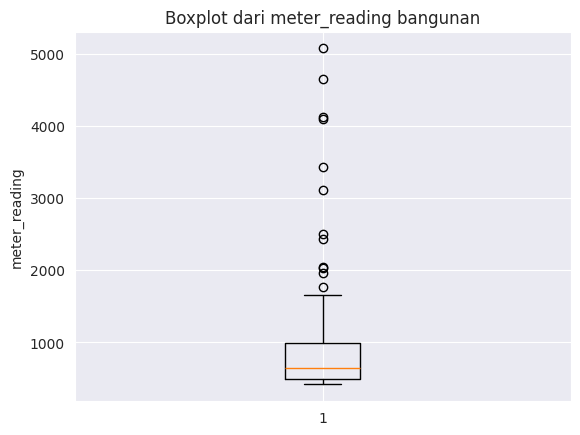

In [ ]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
# Convert 'meter_reading' column to numeric, handling errors
df['meter_reading'] = pd.to_numeric(df['meter_reading'], errors='coerce')

# Drop rows with invalid 'meter_reading' values (introduced by errors='coerce')
df_no_no = df.dropna(subset=['meter_reading'])

Q1 = df_no_no['meter_reading'].quantile(0.25)
Q3 = df_no_no['meter_reading'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (df_no_no["meter_reading"] >= Q1 - 1.5 * IQR) & (df_no_no["meter_reading"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
df_bukan_outlier = df_no_no[bukan_outlier]

# Creating DataFrame With Outliers
df_outlier = df_no_no[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
import matplotlib.pyplot as plt # Import the matplotlib library
plt.boxplot(df_outlier['meter_reading'])
plt.title("Boxplot dari meter_reading bangunan")
plt.ylabel("meter_reading")
plt.show()


Dari grafik terdapat outlier dengan berbagai macam ,sehingga outlier ini dapat merepresentasikan bangunan dengan penggunaan energi yang jauh lebih tinggi dibandingkan bangunan lainnya, karena outlier merupakan nilai berharga dari variabel "meter_reading" maka kita abaikan.

## MISSING VALUE

In [ ]:
# cek mv
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89
wind_direction,0
wind_speed,0


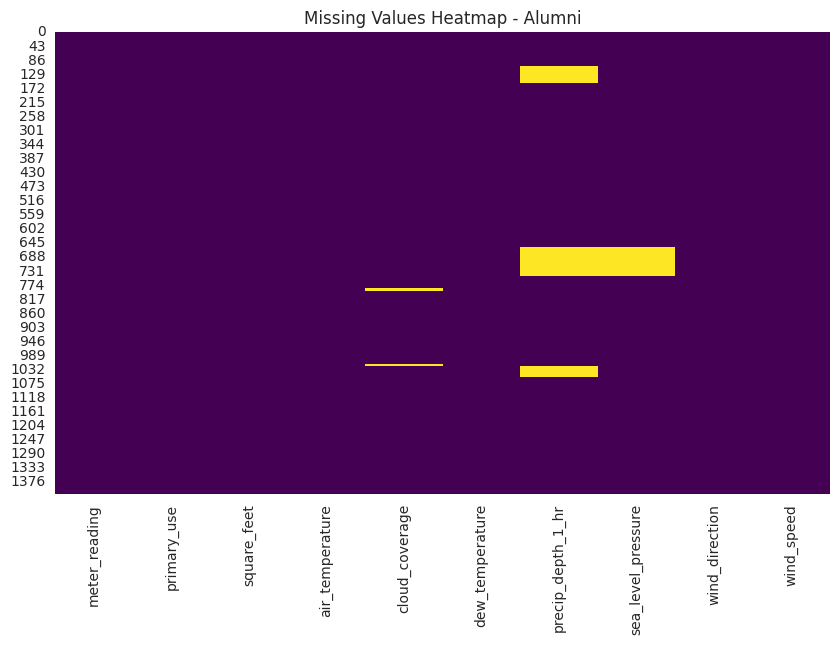

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Alumni')
plt.show()

Dari grafik di atas banyak terdapat missing values di beberapa variabel, sehingga kita perlu imputasi dengan menggunakan metode median karena pada data yang memiliki distribusi tidak normal atau data dengan outliers.

In [ ]:

df['cloud_coverage'] = df['cloud_coverage'].fillna(df['cloud_coverage'].median())

df['precip_depth_1_hr'] = df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median())

df['sea_level_pressure'] = df['sea_level_pressure'].fillna(df['sea_level_pressure'].median())


In [ ]:
def basic_details(df):
    print('Number of rows {} and columns {}'.format(df.shape[0],df.shape[1]))
    k = pd.DataFrame()
    k['dtype'] = df.dtypes
    k['Number of unique value'] = df.nunique()
    k['Missing_value'] = df.isnull().sum()
    k['% missing_value'] = df.isnull().sum()/df.shape[0]
    return k
basic_details(df)

Number of rows 1413 and columns 10


,dtype,Number of unique value,Missing_value,% missing_value
meter_reading,float64,1413,0,0.0
primary_use,category,16,0,0.0
square_feet,int64,1362,0,0.0
air_temperature,float64,14,0,0.0
cloud_coverage,float64,13,0,0.0
dew_temperature,float64,14,0,0.0
precip_depth_1_hr,float64,11,0,0.0
sea_level_pressure,float64,13,0,0.0
wind_direction,float64,14,0,0.0
wind_speed,float64,14,0,0.0


Di dapat tipe data sudah sesuai yang kita inginkan dan missing value sudah tidak ada karena sudah kita imputasi.

## EDA

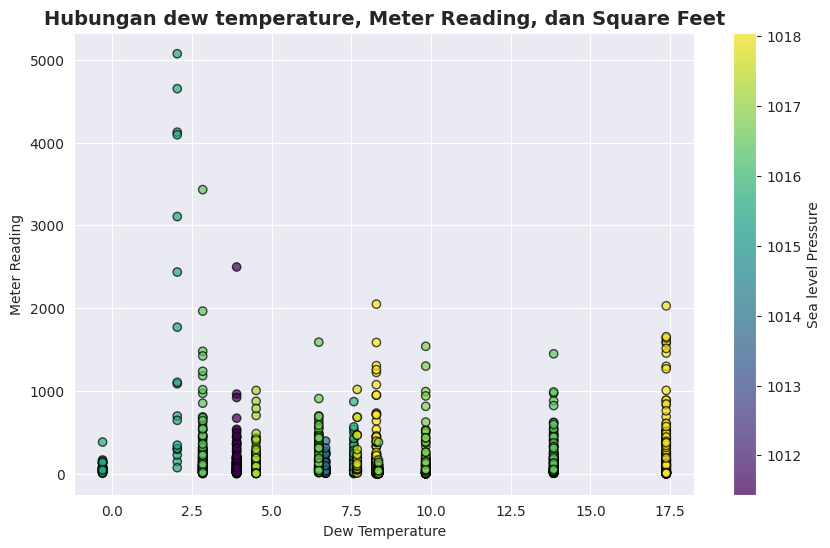

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['dew_temperature'], df['meter_reading'], c=df['sea_level_pressure'],
                       cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Sea level Pressure')
plt.title('Hubungan dew temperature, Meter Reading, dan Square Feet', fontsize=14, fontweight='bold')
plt.xlabel('Dew Temperature')
plt.ylabel('Meter Reading')
plt.show()


Grafik di aats menunjukkan bahwa sebagian besar bangunan memiliki konsumsi energi rendah, di bawah 1.000 kBTU, dengan variasi kelembapan udara. Namun, beberapa bangunan dengan kelembapan sekitar 2,5°C memiliki konsumsi energi yang sangat tinggi. Hal ini dapat disebabkan oleh kebutuhan energi tambahan seperti pengaturan suhu yang intensif untuk mengontrol kelembapan, penggunaan peralatan pendingin atau pemanas besar, atau aktivitas operasional yang memerlukan energi tinggi.

Selain itu, bangunan pada tekanan udara di permukaan laut (ditunjukkan dengan warna kuning atau hijau) cenderung memiliki konsumsi energi lebih besar karena di daerah dengan tekanan udara tersebut, sistem ventilasi, pengatur udara, atau alat transportasi seperti elevator dan eskalator memerlukan daya lebih besar.

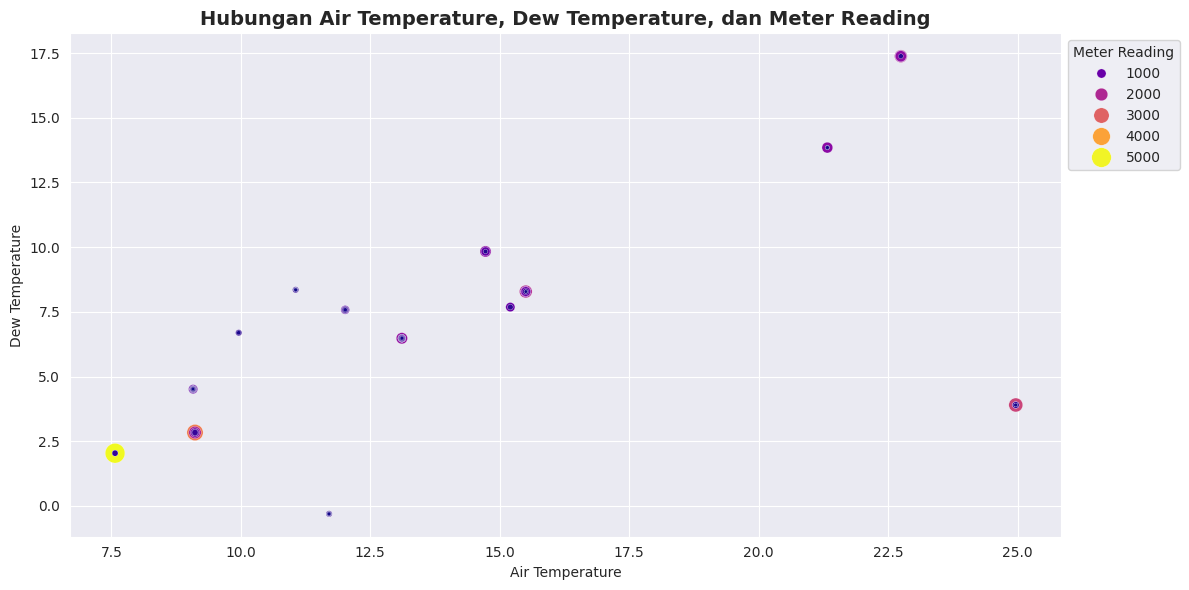

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='air_temperature',
    y='dew_temperature',
    size='meter_reading',
    hue='meter_reading',
    data=df,
    sizes=(5, 200),
    palette='plasma'
)
plt.title('Hubungan Air Temperature, Dew Temperature, dan Meter Reading', fontsize=14, fontweight='bold')
plt.xlabel('Air Temperature')
plt.ylabel('Dew Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Meter Reading')
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan Konsumsi energi yang tinggi (ditandai dengan warna kuning atau merah) lebih banyak terjadi pada suhu udara rendah (sekitar 7,5 - 10°C) dan suhu embun rendah (di bawah 2,5°C).
Pada suhu udara dan embun yang lebih tinggi, konsumsi energi cenderung lebih rendah atau stabil (ditandai dengan warna ungu).
Hal ini mungkin menunjukkan bahwa konsumsi energi meningkat di suhu dingin, misalnya untuk kebutuhan pemanasan bangunan dan lainnya.

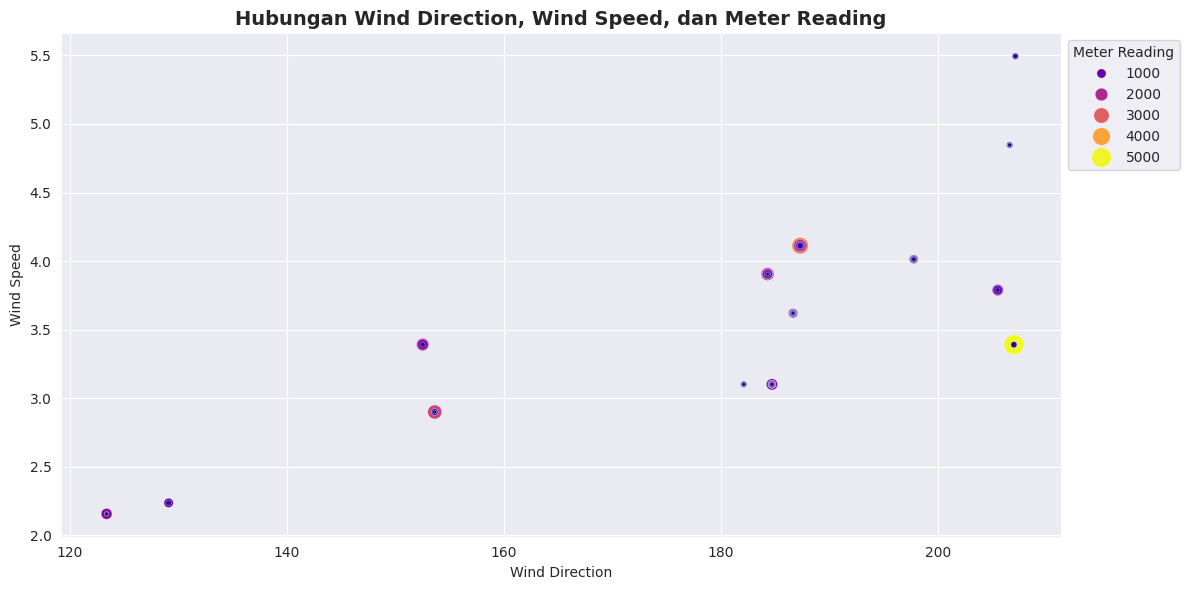

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='wind_direction',
    y='wind_speed',
    size='meter_reading',
    hue='meter_reading',
    data=df,
    sizes=(5, 200),
    palette='plasma'
)
plt.title('Hubungan Wind Direction, Wind Speed, dan Meter Reading', fontsize=14, fontweight='bold')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Meter Reading')
plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa konsumsi energi tinggi (ditandai dengan warna kuning atau merah) lebih sering terjadi saat arah angin berada di atas 200° arah kompas dan kecepatan angin berkisar antara 3,0 hingga 3,5 m/s.

Sebaliknya, pada kondisi angin dengan arah yang lebih tinggi dan kecepatan yang lebih besar, konsumsi energi justru cenderung lebih rendah, terlihat dari warna ungu pada grafik. Hal ini mungkin menunjukkan bahwa pada kecepatan angin yang lebih tinggi, sistem bangunan mampu memanfaatkan sirkulasi udara alami untuk mengurangi kebutuhan energi pada alat pendingin atau ventilasi.

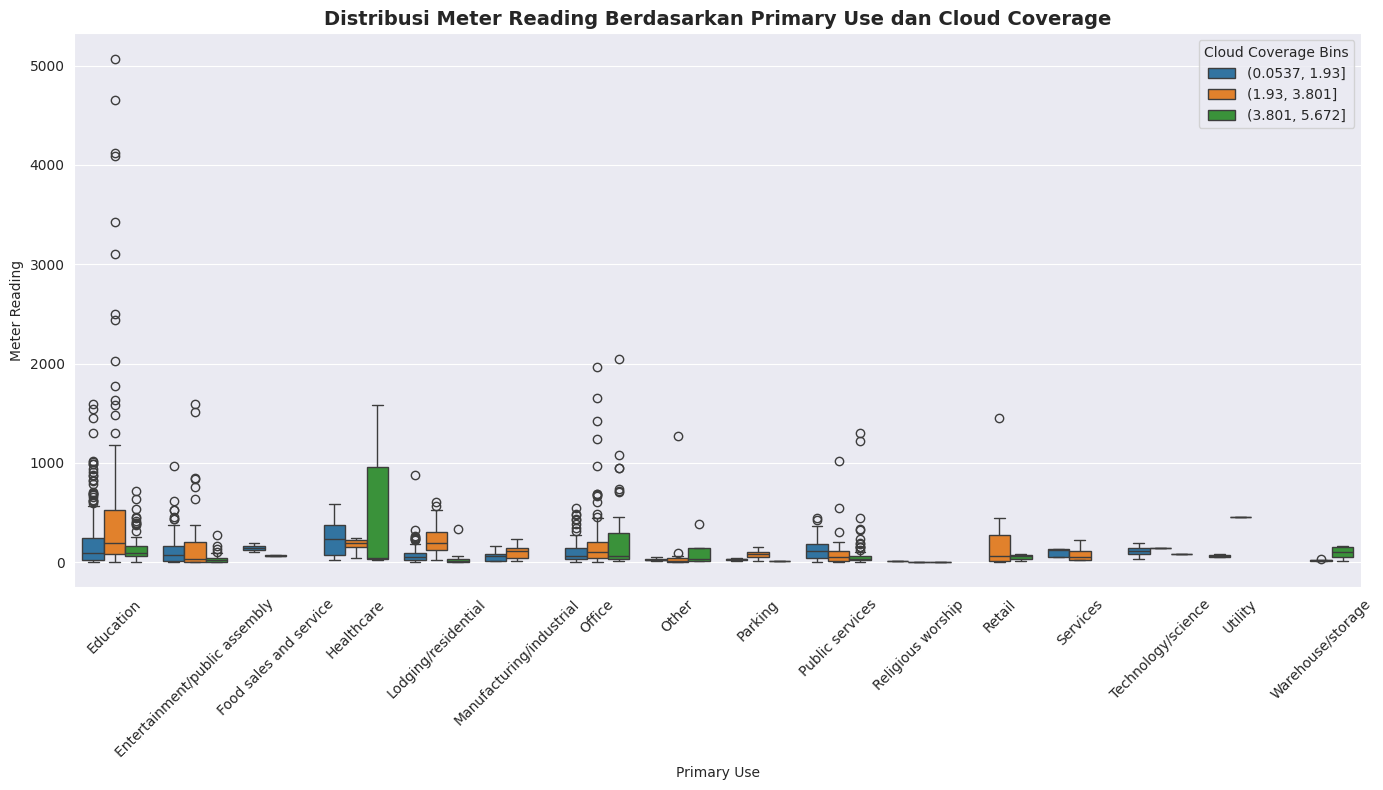

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='primary_use', y='meter_reading', hue=pd.cut(df['cloud_coverage'], bins=3), data=df)
plt.xticks(rotation=45, fontsize=10)
plt.title('Distribusi Meter Reading Berdasarkan Primary Use dan Cloud Coverage', fontsize=14, fontweight='bold')
plt.xlabel('Primary Use')
plt.ylabel('Meter Reading')
plt.legend(title='Cloud Coverage Bins', loc='upper right')
plt.tight_layout()
plt.show()


Dari grafik di atas bangunan Healthcare memiliki variasi konsumsi energi tertinggi, terutama pada tingkat tutupan awan tinggi, dengan beberapa nilai ekstrem (outliers) melebihi 3 okta. Tingkat tutupan awan tidak memiliki pengaruh yang signifikan terhadap sebagian besar kategori, tetapi dapat memengaruhi kategori seperti Healthcare.

Lalu, bangunan Education dan Office menunjukkan konsumsi energi yang relatif tinggi dibandingkan kategori lainnya, dengan sebagian besar berada di kisaran menengah (500 - 1.000 kBTU) dan dengan outliers yang tinggi di kedua bangunan tersebut. Lalu, bangunan seperti Religious Worship, Parking, dan Technology/Science memiliki konsumsi energi yang lebih rendah dan cenderung stabil, tanpa banyak nilai ekstrem.

<ipython-input-54-0606e45f59be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='meter_reading', y='primary_use', data=df, palette="Set2", estimator='mean')


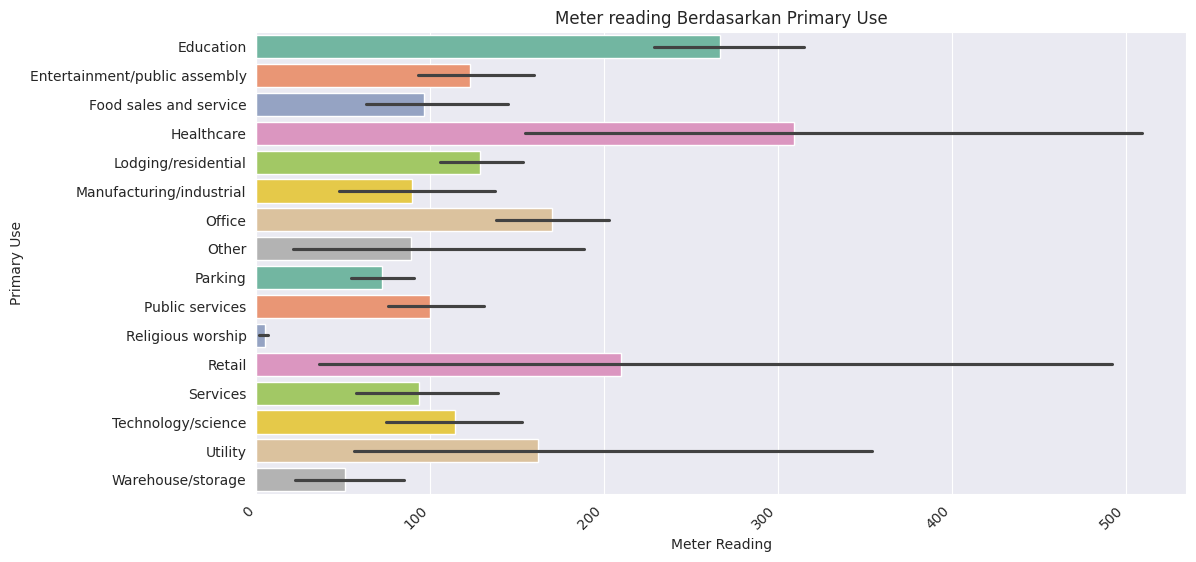

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='meter_reading', y='primary_use', data=df, palette="Set2", estimator='mean')
plt.title('Meter reading Berdasarkan Primary Use')
plt.xlabel('Meter Reading')
plt.ylabel('Primary Use')
plt.xticks(rotation=45, ha='right')  # Memiringkan label prodi untuk keterbacaan
plt.show()


Grafik di atas Menunjukkan bahwa bangunan education dan healthcare memiliki variasi konsumsi energi yang paling besar. Hal ini disebabkan oleh perbedaan kebutuhan operasional, seperti penggunaan peralatan elektronik, dan kebutuhan energi tinggi untuk peralatan medis serta pengaturan suhu yang stabil di bangunan kesehatan.

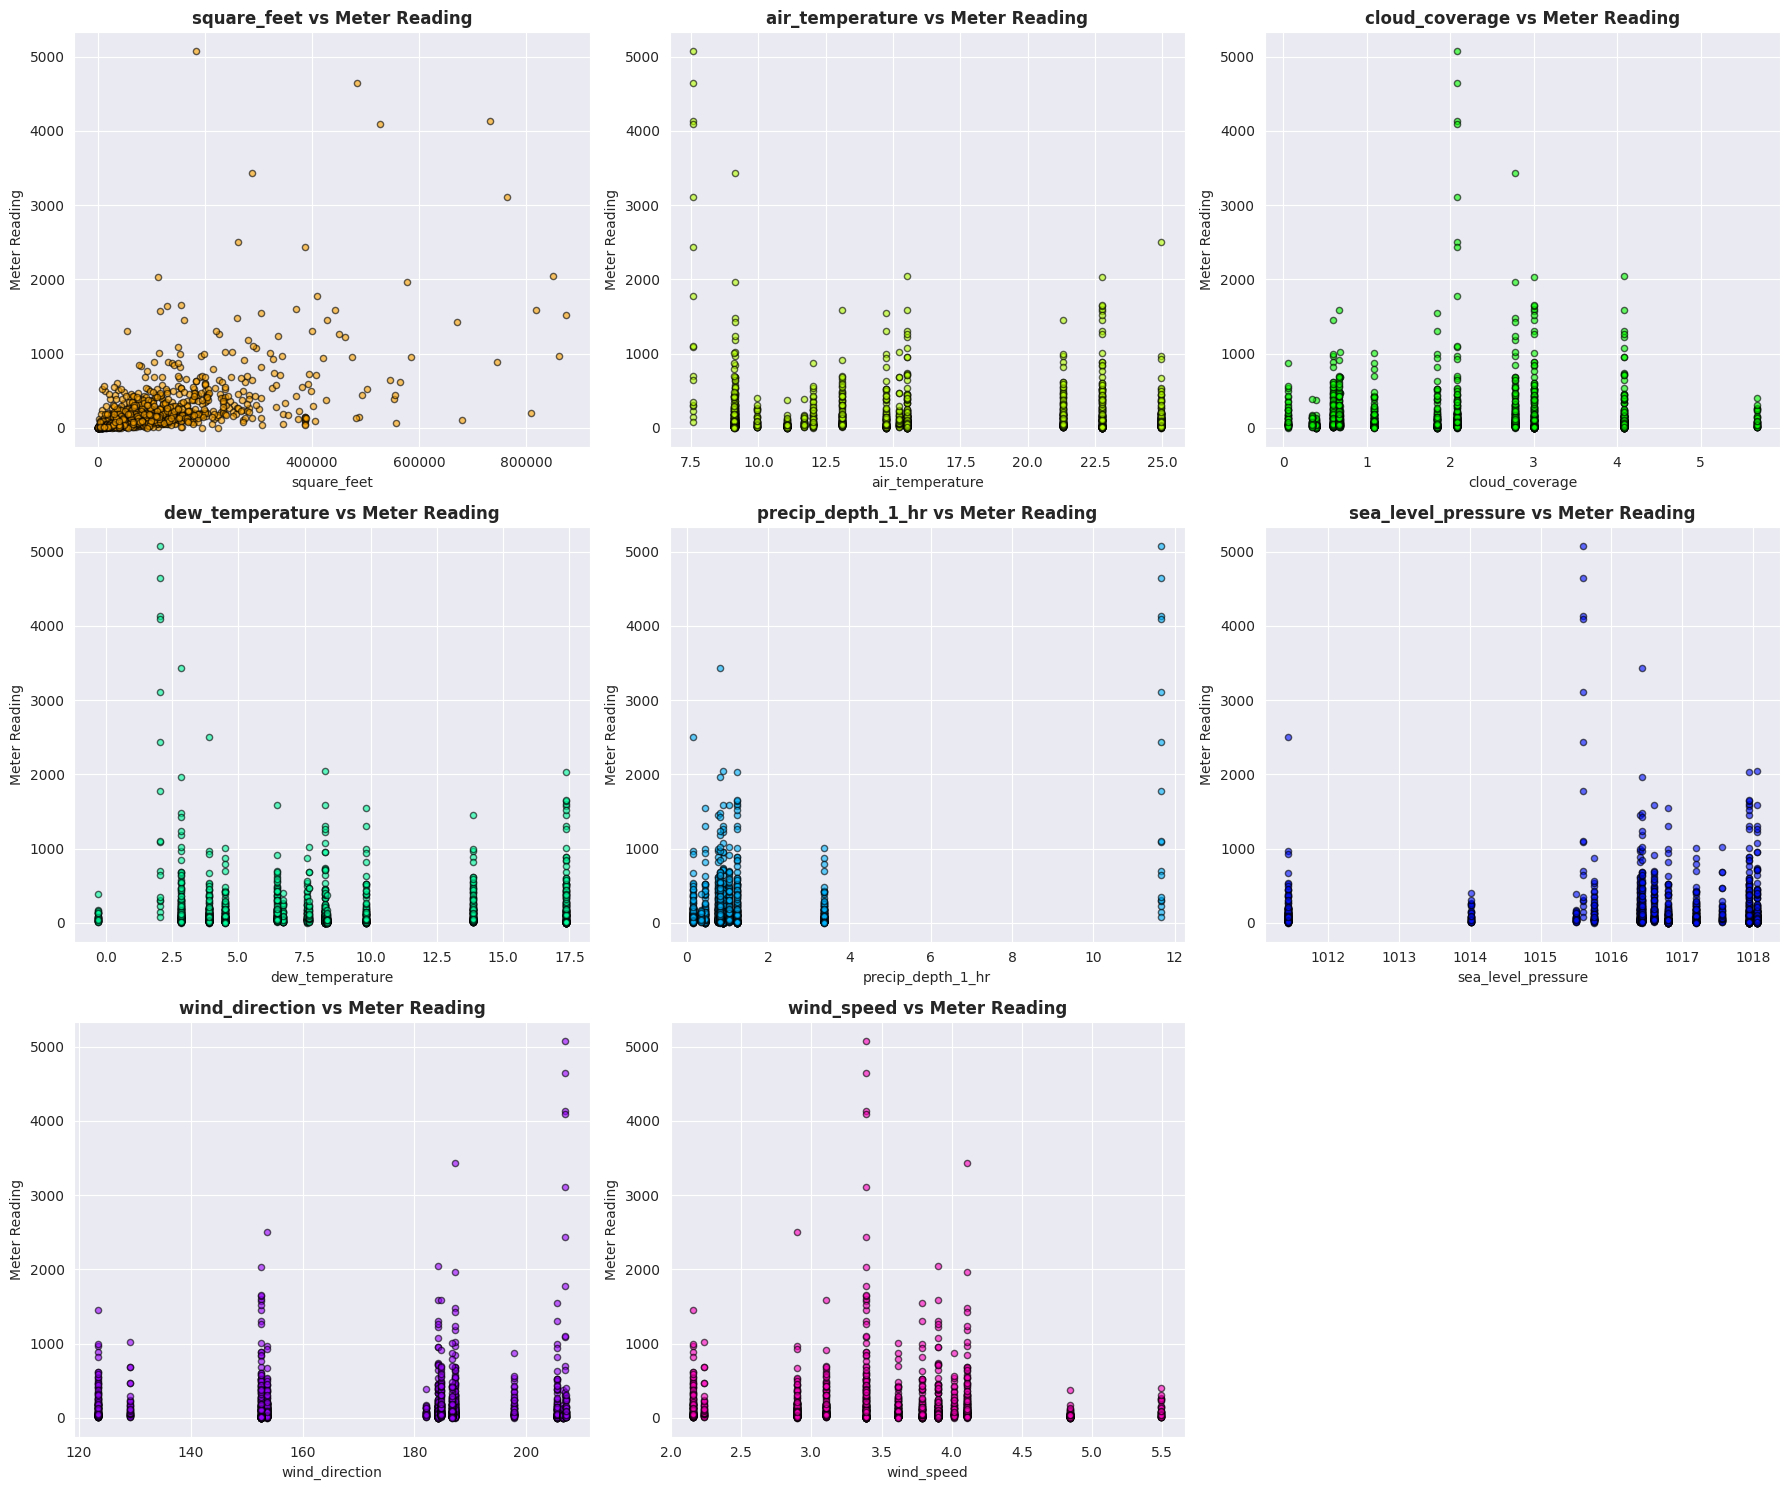

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Daftar variabel untuk scatter plot
variables = [
    'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
    'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed'
]

# Membuat palet warna cerah yang berbeda untuk setiap plot
color_palette = sns.color_palette('hsv', len(variables))

# Membuat subplots
n_cols = 3  # Jumlah kolom dalam layout
n_rows = -(-len(variables) // n_cols)  # Menghitung jumlah baris dengan pembulatan ke atas
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 5))

# Flatten axis untuk mempermudah iterasi
axes = axes.flatten()

# Loop untuk membuat scatter plot
for i, var in enumerate(variables):
    ax = axes[i]
    color = color_palette[i % len(color_palette)]  # Ambil warna dari palet secara bergantian

    # Scatterplot untuk variabel numerikal
    ax.scatter(
        df[var],
        df['meter_reading'],
        alpha=0.6,
        color=color,  # Gunakan warna unik
        edgecolor='k',  # Tambahkan edge hitam
        s=20  # Ukuran marker
    )
    ax.set_xlabel(var, fontsize=10)

    # Tambahkan judul
    ax.set_title(f'{var} vs Meter Reading', fontsize=12, fontweight='bold')
    ax.set_ylabel('Meter Reading', fontsize=10)

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout
plt.tight_layout()
plt.show()


Dari grafik diatas didapat informasi yaitu:

1. **square_feet vs Meter Reading**

Bangunan dengan ukuran besar menunjukkan kecenderungan memiliki Meter Reading yang lebih tinggi. Namun, ada juga data yang tersebar secara acak, yang mungkin menunjukkan faktor lain memengaruhi Meter Reading selain luas bangunan.



2. **air_temperature vs Meter Reading**

Pemakaian energi konsisten dalam berbagai rentang suhu udara, dengan sedikit peningkatan untuk suhu sekitar 15-20°C. Pola tidak terlalu jelas menunjukkan hubungan yang kuat.



3. **cloud_coverage vs Meter Reading**

Tidak ada pola hubungan signifikan antara cloud coverage dan pemakaian energi. Data tersebar dengan nilai Meter Reading yang bervariasi di seluruh cloud coverage.



4. **dew_temperature vs Meter Reading**

temperatur titik embun tampak memiliki hubungan lemah dengan pemakaian energi, meskipun ada sedikit konsentrasi data pada titik embun rendah (di bawah 5°C).



5. **precip_depth_1_hr vs Meter Reading**

Kedalaman presipitasi (hujan/salju) per jam hampir tidak memengaruhi pemakaian eneri, dengan sebagian besar nilai terkonsentrasi di kisaran presipitasi rendah (0-2 mm).



6. **sea_level_pressure vs Meter Reading**

Tekanan udara menunjukkan hubungan yang lemah dengan pemakaian energi. Namun, beberapa data tampak terkonsentrasi di kisaran tekanan 1015-1018 hPa.



7. **wind_direction vs Meter Reading**

Arah angin tidak menunjukkan pola signifikan terhadap pemakaian energi, dengan nilai Meter Reading tersebar di berbagai arah angin.



8. **wind_speed vs Meter Reading**

Kecepatan angin juga menunjukkan hubungan lemah terhadap pemakaian energi, dengan sebagian besar data terkonsentrasi pada kecepatan angin rendah (di bawah 4 m/s).


## FEATURE ENGINEERING

### Encoding variabel kategorik

In [ ]:
categorical_columns = ['primary_use']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

Untuk melakukan one-hot encoding (OHE) pada kolom kategorikal dalam dataframe(df).

In [ ]:
df_encode.head()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,OHE_Entertainment/public assembly,...,OHE_Office,OHE_Other,OHE_Parking,OHE_Public services,OHE_Religious worship,OHE_Retail,OHE_Services,OHE_Technology/science,OHE_Utility,OHE_Warehouse/storage
0,237.749127,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472,0,...,0,0,0,0,0,0,0,0,0,0
1,118.553743,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472,0,...,0,0,0,0,0,0,0,0,0,0
2,23.626500,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472,0,...,0,0,0,0,0,0,0,0,0,0
3,382.736016,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472,0,...,0,0,0,0,0,0,0,0,0,0
4,1579.174237,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472,0,...,0,0,0,0,0,0,0,0,0,0


### Standarisasi variabel target

In [ ]:
import numpy as np

# Lakukan log-transformasi pada target
df_encode['log_meter_reading'] = np.log1p(df_encode['meter_reading'])

# Pisahkan data latih dan uji dengan kolom baru
X = df_encode.drop(columns=['meter_reading', 'log_meter_reading'])
y = df_encode['log_meter_reading']

Melakukan transformasi logaritma pada kolom 'meter_reading' untuk mengubah distribusi data target menjadi lebih mendekati distribusi normal.

## MODELING

### Data train-test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data pelatihan:", X_train.shape)
print("Ukuran data pengujian:", X_test.shape)


Ukuran data pelatihan: (1130, 23)
Ukuran data pengujian: (283, 23)


Untuk membagi data menjadi set pelatihan (training set) dan set pengujian (test set).

### Membuat model

In [ ]:
# Membuat model DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42, max_depth=5)
# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### Evaluasi model

In [ ]:
# Prediksi dengan data pengujian
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae_train = mean_absolute_error(y_train, model.predict(X_train)) # get prediction for X_train here
mae_test = mean_absolute_error(y_test, y_pred)

# Prediksi dengan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
rmse = np.sqrt(mse)
mape_train = mean_absolute_percentage_error(y_train, model.predict(X_train)) # get prediction for X_train here
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f"RMSE: {rmse}")
print(f'R² Score: {r2}')
print(f"MAE Train: {mae_train:.3f}")
print(f"MAE Test: {mae_test:.3f}")
print(f"MAPE Train: {mape_train:.3f}%")
print(f"MAPE Test: {mape_test:.3f}%")

Mean Squared Error: 0.5999914792128151
RMSE: 0.7745911690774787
R² Score: 0.7323058525237329
MAE Train: 0.589
MAE Test: 0.594
MAPE Train: 6.174%
MAPE Test: 0.240%




1. **Mean Squared Error (MSE)**  
   Nilai MSE sebesar **0.5999** menunjukkan rata-rata kuadrat error cukup kecil, menandakan bahwa model memiliki performa yang baik dalam memprediksi target data. Semakin kecil nilai ini, semakin baik akurasi model.

2. **Root Mean Squared Error (RMSE)**  
   Nilai RMSE sebesar **0.7746** mendukung hasil MSE. RMSE lebih mudah diinterpretasikan karena berada dalam skala yang sama dengan target data. Hasil ini menunjukkan tingkat error relatif rendah.

3. **R² Score**  
   Nilai R² sebesar **0.7323** berarti sekitar 73.23% variasi dalam data target dapat dijelaskan oleh model. Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam menjelaskan hubungan antara prediktor dan variabel respons.

4. **Mean Absolute Error (MAE)**  
   - **MAE Train**: **0.589**  
   - **MAE Test**: **0.594**  
   MAE pada data pelatihan dan pengujian hampir sama, yang menunjukkan model tidak mengalami overfitting atau underfitting yang signifikan. Model mampu memberikan prediksi yang konsisten antara data pelatihan dan pengujian.

5. **Mean Absolute Percentage Error (MAPE)**  
   - **MAPE Train**: **6.174%**  
   - **MAPE Test**: **0.240%**  
   MAPE menunjukkan kesalahan rata-rata relatif terhadap nilai sebenarnya. Pada data pengujian, MAPE sangat kecil (**0.240%**), yang menunjukkan model memiliki kemampuan prediksi yang sangat akurat pada dataset ini.

Insight
- **Model Generalisasi**: Kesamaan nilai MAE dan MAPE pada data pelatihan dan pengujian menunjukkan bahwa model memiliki kemampuan generalisasi yang baik. Ini berarti model dapat diaplikasikan pada data baru dengan tingkat akurasi yang serupa.
- **Hubungan Antara Prediktor dan Target**: Dengan R² sebesar 73.23%, model menunjukkan hubungan yang cukup kuat antara variabel prediktor dan target. Namun, masih ada sekitar 26.77% variasi yang tidak dapat dijelaskan oleh model, mungkin karena faktor lain yang tidak dimasukkan dalam data.
- **Evaluasi Metrik Tambahan**: Jika ingin meningkatkan performa, dapat dievaluasi apakah ada prediktor yang lebih signifikan atau fitur baru yang dapat membantu menjelaskan variabilitas target secara lebih baik.

Secara keseluruhan, model ini sudah cukup baik untuk digunakan, terutama jika konteks aplikasinya tidak memerlukan akurasi yang sangat tinggi.

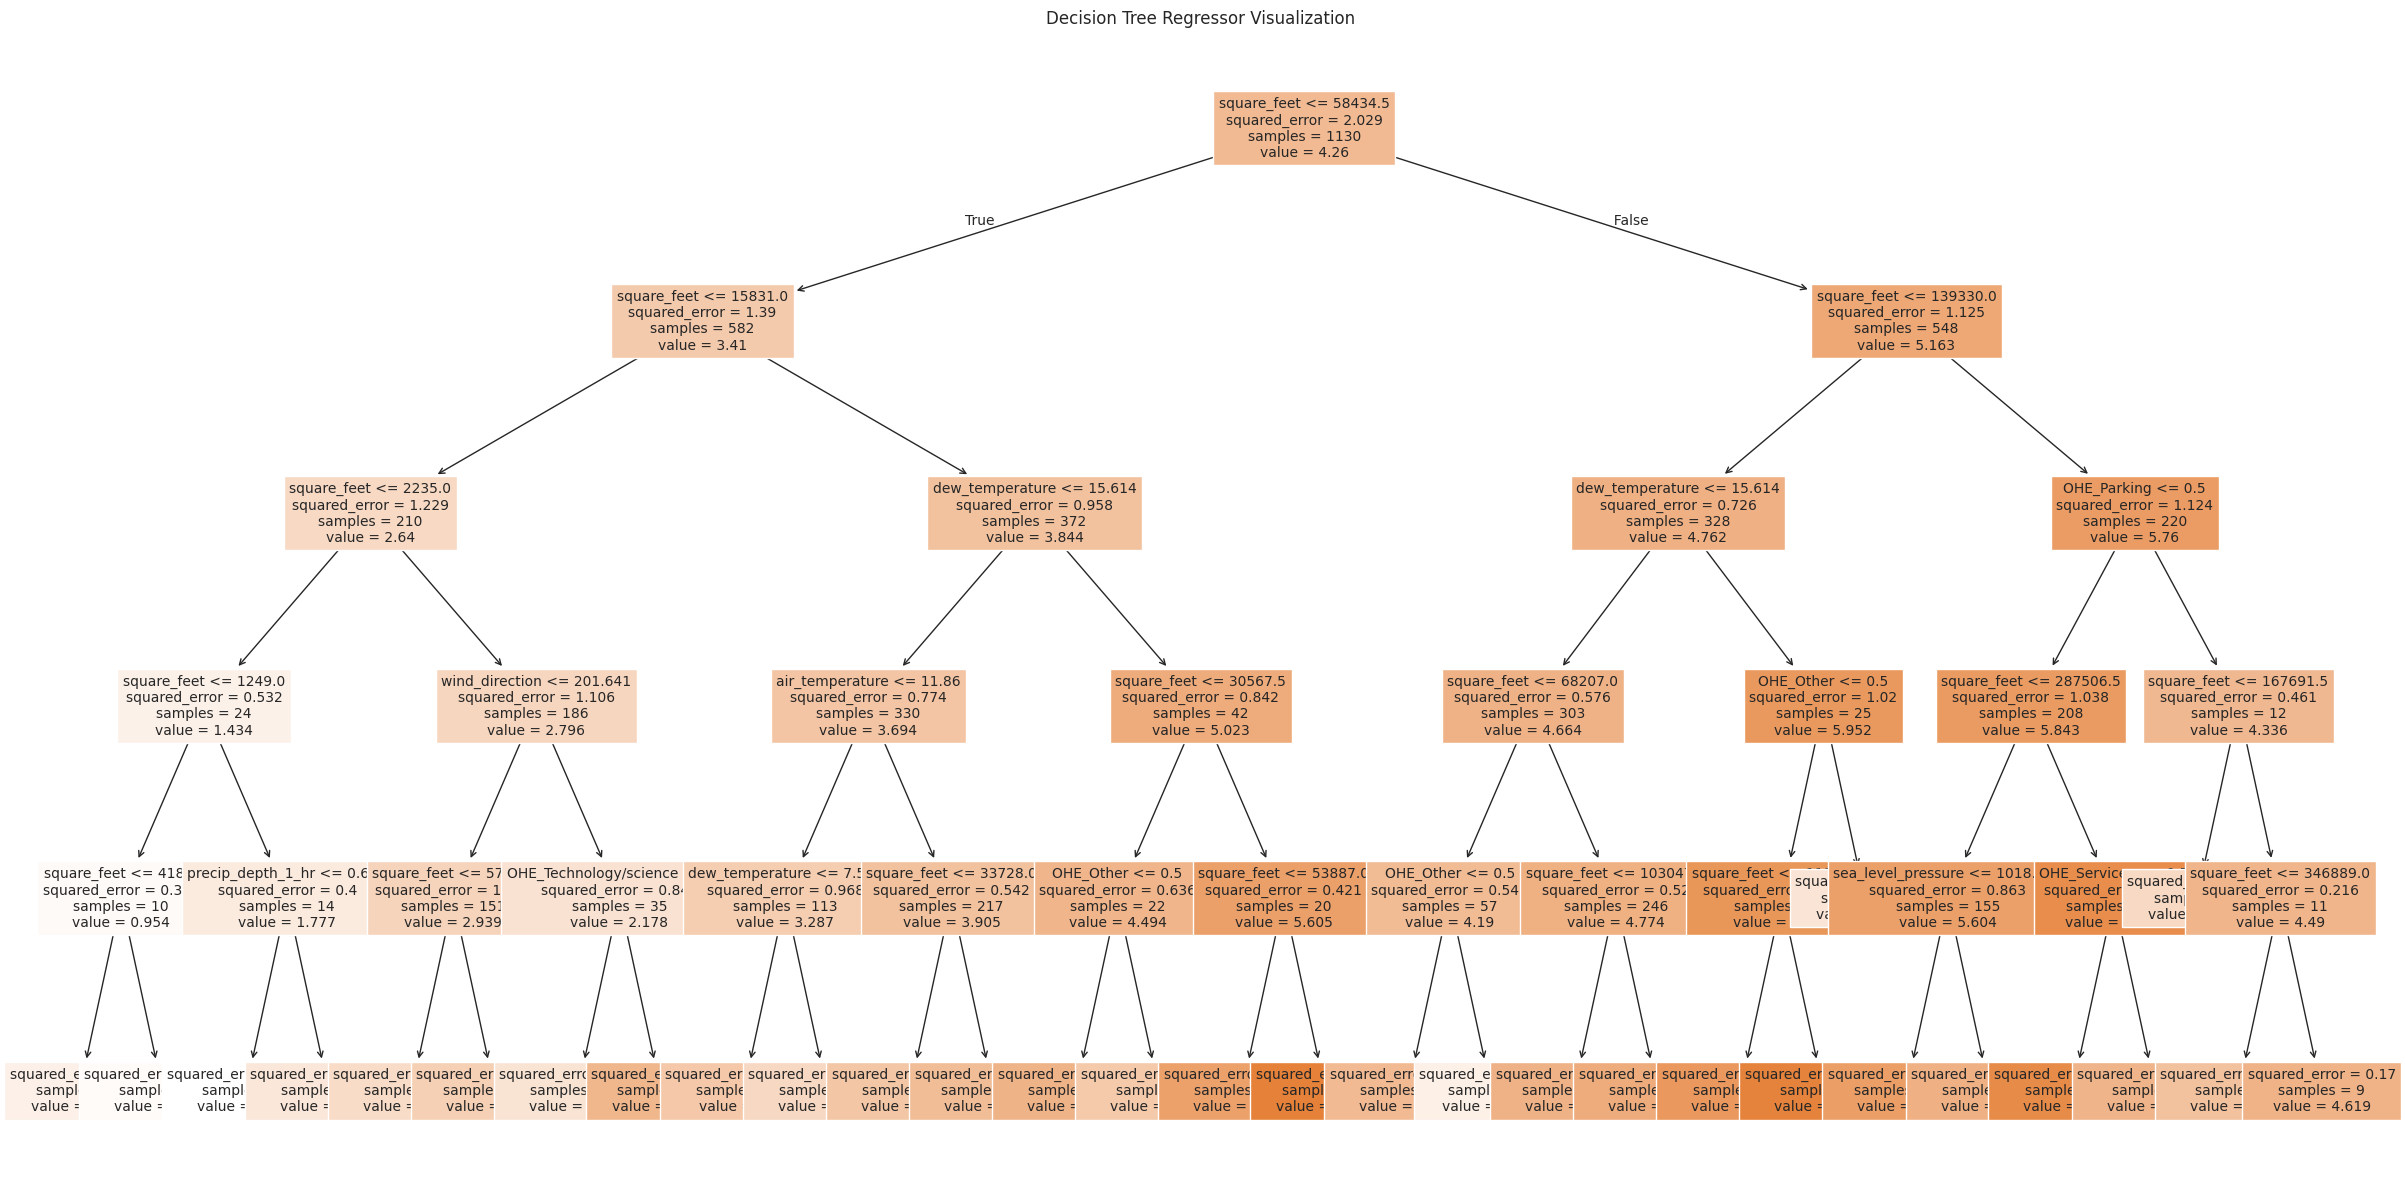

In [ ]:
# Visualisasi pohon keputusan
plt.figure(figsize=(30,15))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree Regressor Visualization")
plt.show()

 **Kesimpulan**:  
1. **Ukuran properti (square_feet)** adalah faktor utama yang menentukan konsumsi energi. Properti dengan ukuran lebih besar cenderung memiliki konsumsi energi yang lebih tinggi.  
2. **Kondisi lingkungan**, seperti suhu udara (air_temperature) dan kelembapan (dew_temperature), juga memengaruhi konsumsi energi, misalnya karena kebutuhan pemanas atau pendingin ruangan.  
3. Model ini bekerja cukup baik, dengan pembagian data yang menghasilkan prediksi konsumsi energi lebih akurat (ditunjukkan oleh squared error yang kecil di node daun).

**Insight**:  
1. Konsumsi energi meningkat seiring bertambahnya ukuran properti, terutama untuk properti besar dengan kategori fasilitas tertentu (misalnya `Parking` atau `Other`).  
2. **Suhu dan kelembapan** menjadi faktor tambahan yang signifikan—misalnya, suhu rendah mungkin meningkatkan konsumsi energi untuk pemanas, sementara suhu tinggi meningkatkan kebutuhan pendingin.  
3. Model ini cocok digunakan untuk memprediksi kebutuhan energi berdasarkan ukuran properti dan kondisi lingkungan, memungkinkan optimalisasi sumber daya untuk efisiensi energi.  


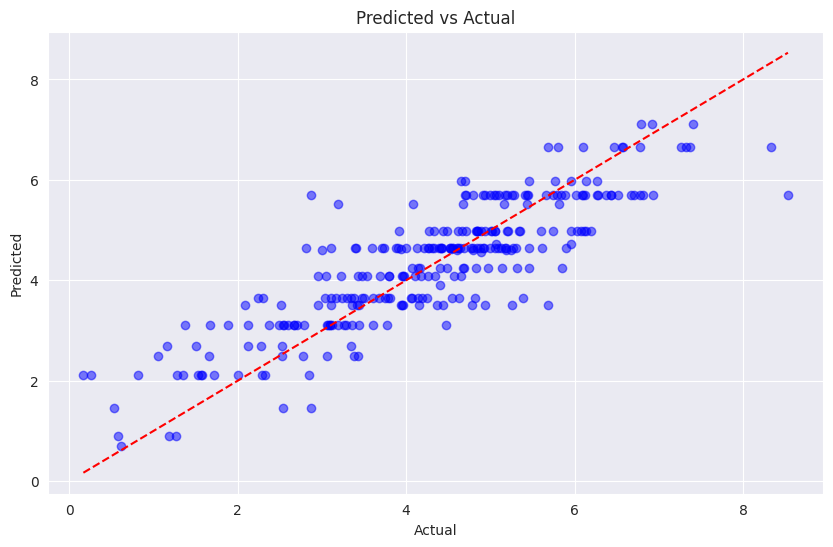

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Model Decision Tree menunjukkan performa yang baik, terutama untuk nilai target yang sedang (3-6). Namun, prediksi untuk nilai ekstrem (terlalu rendah atau tinggi) memiliki kesalahan, yang kemungkinan disebabkan oleh overfitting.



## KESIMPULAN DAN SARAN

### Kesimpulan

Dari visualisasi yang kita dapatkan sebelumnya, kita dapat:

1. **Kelembapan dan Tekanan Udara:**

Konsumsi energi tinggi lebih sering terjadi pada bangunan dengan kelembapan udara sekitar 2,5°C dan tekanan udara di permukaan laut. Hal ini dapat disebabkan oleh kebutuhan energi tambahan untuk pengaturan suhu dan penggunaan peralatan besar, seperti sistem ventilasi atau pendingin/pemanas.
2. **Suhu Udara dan Suhu Embun:**

Konsumsi energi lebih tinggi ditemukan pada suhu udara rendah (sekitar 7,5 - 10°C) dan suhu embun rendah (di bawah 2,5°C). Ini menunjukkan bahwa pada suhu dingin, kebutuhan energi meningkat, mungkin untuk pemanasan bangunan.
3. **Kecepatan dan Arah Angin:**

Pada kondisi angin dengan arah tertentu (di atas 200 derajat) dan kecepatan sekitar 3,0 hingga 3,5 m/s, konsumsi energi cenderung lebih tinggi. Sebaliknya, pada kecepatan angin yang lebih besar, konsumsi energi lebih rendah karena sirkulasi udara alami mengurangi kebutuhan energi pada sistem pendingin atau ventilasi.
4. **Kategori Bangunan:**

Bangunan Healthcare memiliki variasi konsumsi energi tertinggi, terutama dengan tingkat tutupan awan tinggi. Sementara itu, bangunan di kategori Education dan Office menunjukkan konsumsi energi yang relatif tinggi dibandingkan kategori lainnya, sedangkan bangunan Religious Worship, Parking, dan Technology/Science memiliki konsumsi energi yang lebih rendah dan stabil.
5. **Variasi Konsumsi Energi pada Bangunan:**

Kategori bangunan seperti Education dan Healthcare menunjukkan variasi konsumsi energi terbesar karena kebutuhan operasional yang berbeda, seperti penggunaan peralatan elektronik di Education dan peralatan medis di Healthcare yang memerlukan energi tinggi dan pengaturan suhu stabil.
6. **Hubungan dengan Faktor Lain:**

Beberapa faktor, seperti ukuran bangunan (square_feet), suhu udara, dan kecepatan angin, tampaknya memiliki pengaruh lemah terhadap konsumsi energi. Namun, hubungan yang jelas hanya muncul pada beberapa variabel tertentu (misalnya, suhu udara sekitar 15-20°C, kelembapan rendah, dan tekanan udara tertentu).

**Model Decision Tree**
- Model Decision Tree memiliki kemampuan generalisasi yang baik, terbukti dari kesamaan nilai MAE dan MAPE antara data pelatihan dan pengujian. Dengan R² sebesar 73.23%, model menunjukkan hubungan yang cukup kuat antara variabel prediktor (seperti ukuran properti, suhu, dan kelembapan) dengan target, meskipun masih ada 26.77% variasi yang tidak terjelaskan. Model ini mengindikasikan bahwa konsumsi energi meningkat seiring dengan ukuran properti dan dipengaruhi oleh kondisi lingkungan, seperti suhu dan kelembapan. Secara keseluruhan, model ini cukup baik untuk memprediksi kebutuhan energi dan dapat mendukung optimalisasi sumber daya untuk efisiensi energi.

### Saran

1. **Optimalkan Pengaturan Suhu dan Kelembapan**

 Konsumsi energi tinggi pada kelembapan rendah dan suhu dingin karena kebutuhan pengaturan suhu yang intensif. Saran dari kami  gunakan HVAC berbasis teknologi pintar untuk efisiensi energi. Manfaatnya mengurangi pemborosan energi pada kondisi ekstrem.

2. **Pemanfaatan Sirkulasi Udara Alami**

 Konsumsi energi tinggi terjadi pada angin berkecepatan rendah. Saran dari kami rancang bangunan untuk memanfaatkan sirkulasi udara alami. Manfaatnya mengurangi ketergantungan pada sistem pendingin atau pemanas mekanis.

3. **Fokus pada Optimalisasi Energi untuk Bangunan Healthcare dan Education**

 Bangunan ini memiliki konsumsi energi tertinggi karena kebutuhan operasional intensif. Saran dari kami terapkan energi terbarukan, audit energi, dan manajemen energi cerdas. Manfaatnya menurunkan pengeluaran energi tanpa mengganggu operasional.

4. **Edukasi dan Pelatihan Pengelolaan Energi**

 Konsumsi energi sering tidak efisien karena kurangnya edukasi. Saran dari kami adakan pelatihan pengelolaan energi untuk pengelola bangunan. Manfaat: Peningkatan kesadaran dan pengurangan energi yang terbuang.

5. **Penyesuaian Tarif Berdasarkan Profil Penggunaan**

 Bangunan dengan pola konsumsi stabil dan fluktuatif memerlukan pendekatan tarif berbeda. Saran dari kami terapkan tarif dinamis berdasarkan pola konsumsi. Manfaatnya Mendorong efisiensi energi dengan insentif ekonomi.

6.  **Integrasi Teknologi IoT untuk Pemantauan Energi**

 Variasi konsumsi energi yang tidak selalu berkorelasi dengan faktor fisik, seperti suhu udara atau ukuran bangunan, menunjukkan bahwa terdapat faktor-faktor lain, seperti perilaku operasional atau penggunaan peralatan tertentu, yang memengaruhi konsumsi energi. Hal ini membuat pengelolaan energi menjadi kurang efektif jika hanya mengandalkan analisis data statis.

 Saran dari kami  mengintegrasikan sensor IoT (Internet of Things) untuk pemantauan energi secara real-time dapat memberikan informasi yang lebih detail, perusahaan dapat memantau penggunaan energi pada setiap waktu, mendeteksi lonjakan konsumsi, dan mengidentifikasi peralatan atau area yang tidak efisien.

 Manfaatnya itu dapat pemantauan real-time memungkinkan identifikasi pemborosan energi secara cepat sehingga tindakan korektif dapat diambil segera.



**Rekomendasi untuk Penggunaan Lebih Lanjut**:
1. Optimasi lebih lanjut pada hyperparameter (seperti max_depth atau min_samples_split) untuk mengurangi overfitting tanpa mengorbankan interpretabilitas.
2. Menggunakan post-pruning untuk menyederhanakan pohon tanpa mengurangi terlalu banyak akurasi.
3. Memastikan bahwa fitur yang digunakan sudah mencakup semua informasi penting untuk memprediksi nilai target, terutama untuk menangani outlier atau data ekstrem.

Dengan pendekatan ini, Decision Tree tetap menjadi pilihan yang solid untuk aplikasi dengan kebutuhan prediksi akurat sekaligus interpretasi yang jelas.